# Introduction

#### Netflix start their history in 1997 as a DVD rental service. But now, They are one of the largest entertainment/media company. With this change, the number of Netflix users have increased and also the number of their contents have been increased. 


## Loading the dataset

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

netflix_data = pd.read_csv("netflix_titles.csv")
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## The number of the Movie and the TV Show in Netflix and its proportion

[Text(0.5, 1.0, 'Number of contents')]

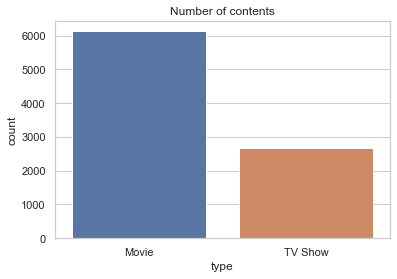

In [2]:
sns.set(style="whitegrid")
sns.countplot(x="type", data=netflix_data).set(title="Number of contents")

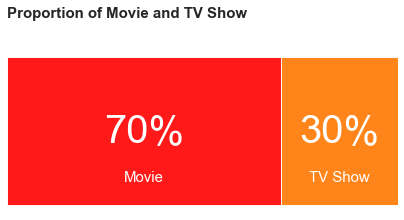

In [3]:
x = netflix_data.groupby(["type"])["type"].count()
y = len(netflix_data)
r = ((x/y)).round(2)
ratio = pd.DataFrame(r).T

fig, ax = plt.subplots(1, 1, figsize=(7, 3))

ax.barh(ratio.index, ratio["Movie"], color="#ff0000", alpha=0.9, label="Movie")
ax.barh(ratio.index, ratio["TV Show"], color="#ff7700", alpha=0.9, left=ratio["Movie"], label="TV Show")

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

for i in ratio.index:
    ax.annotate(f"{int(ratio['Movie'][i]*100)}%",
                   xy = (ratio["Movie"][i]/2, i),
                   va = "center", ha="center", fontsize=40, color="white", fontfamily="sans-serif")
    ax.annotate("Movie",
                   xy = (ratio["Movie"][i]/2, -0.25),
                   va = 'center', ha = 'center', fontsize=15, color="white", fontfamily="sans-serif")

for i in ratio.index:
    ax.annotate(f"{int(ratio['TV Show'][i]*100)}%",
                   xy = (ratio['Movie'][i]+ratio["TV Show"][i]/2, i),
                   va = 'center', ha = 'center', fontsize=40, color='white', fontfamily="sans-serif")
    ax.annotate("TV Show",
                   xy = (ratio["Movie"][i]+ratio["TV Show"][i]/2, -0.25),
                   va = 'center', ha='center', fontsize=15, color='white', fontfamily="sans-serif")

fig.text(0.125, 1.03, "Proportion of Movie and TV Show", fontsize = 15, fontweight='bold')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.legend().set_visible(False)
plt.show()

## Which country has published more their contents on Netflix?

<AxesSubplot:title={'center':'Top 10 countries on Netflix'}>

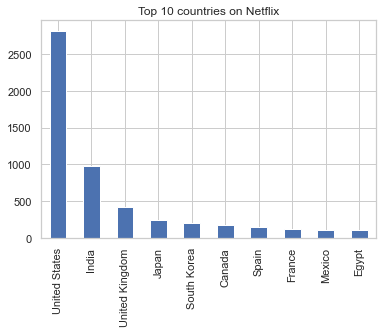

In [4]:
netflix_data["country"].value_counts()[:10].plot(kind="bar", title="Top 10 countries on Netflix")

## Analysis of duration of movies on Netflix and their released year

In [5]:
netflix_movies = netflix_data[netflix_data["type"]=="Movie"]
netflix_movies = netflix_movies[netflix_movies["duration"].notnull()]
netflix_movies["duration"] = netflix_movies["duration"].str.replace(" min", "")
netflix_movies["duration"] = netflix_movies['duration'].astype(str).astype(int) 
netflix_movies["duration"]

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6128, dtype: int64

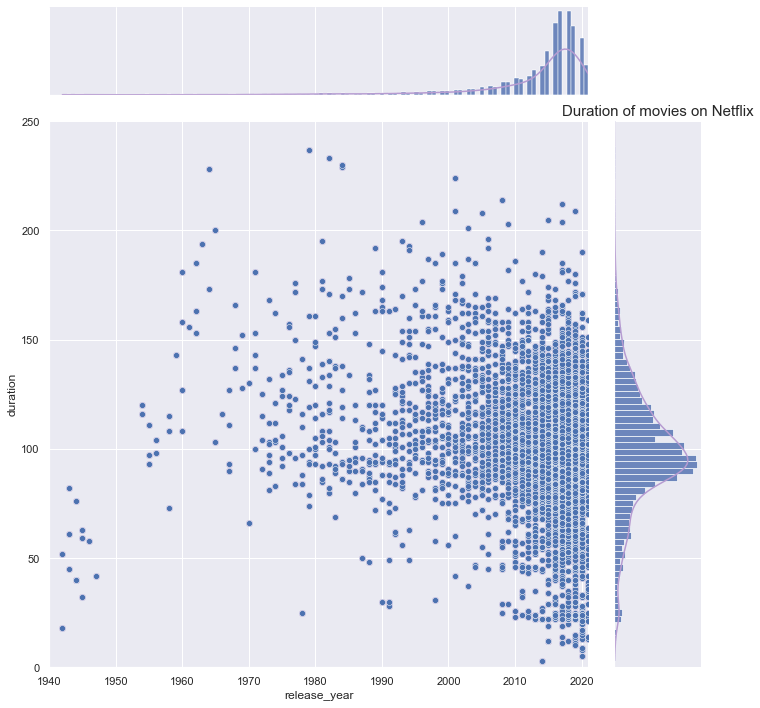

In [6]:
sns.set(rc={"figure.figsize":(20, 60)})

g=sns.jointplot(data=netflix_movies, x="release_year", y="duration", kind="reg", color="#b69bd1", dropna=True, height=10, 
               space=0.3, ratio=5, xlim=(1940, 2021), ylim=(0, 250), fit_reg=False)
plt.rc("legend", fontsize=15)
plt.xlabel('Release year of movie', fontsize=15)
plt.ylabel('Duration of movie', fontsize=15)
plt.title('Duration of movies on Netflix', fontsize=15 )
plt.tick_params(axis="both", labelsize=15)
g.plot(sns.scatterplot, sns.histplot)

In [7]:
short_movies = netflix_movies.loc[netflix_movies["duration"] < 50]
short_movies = short_movies[["title", "director", "listed_in","release_year", "duration"]]
short_movies.head(20)

,title,director,listed_in,release_year,duration
45,My Heroes Were Cowboys,Tyler Greco,Documentaries,2021,23
71,A StoryBots Space Adventure,David A. Vargas,Children & Family Movies,2021,13
77,Little Singham - Black Shadow,Prakash Satam,"Children & Family Movies, Comedies",2021,48
470,Bridgerton - The Afterparty,NaN,Movies,2021,39
484,Lee Su-geun: The Sense Coach,Kim Joo-hyung,Stand-Up Comedy,2021,46
495,Awon Boyz,Tolulope Itegboje,"Documentaries, International Movies",2019,38
560,Audible,Matt Ogens,"Documentaries, Sports Movies",2021,39
694,Aziza,Soudade Kaadan,"Comedies, Dramas, Independent Movies",2019,13
695,Besieged Bread,Soudade Kaadan,"Dramas, International Movies",2015,12
729,Bling Empire - The Afterparty,NaN,Movies,2021,36


# Genres of movies on Netflix and their corretion

In [8]:
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.colors

In [16]:
colors = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ebe8e8", '#ff0000', "#292626"])

In [12]:
def genre_heatmap(netflix_data, title):
    netflix_data["genre"] = netflix_data["listed_in"].apply(lambda x: x.replace(" ,",",").replace(", ",",").split(","))
    Types = []
    for i in netflix_data["genre"]: Types += i
    Types = set(Types)
    print("There are {} kinds of genre in the Netflix {}".format(len(Types), title))
    test = netflix_data["genre"]
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54, .88, "Genre correlation", fontfamily="Times New Roman", fontweight="bold", fontsize=15)
    pl = sns.heatmap(corr, mask=mask, cmap=colors, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    plt.show()

There are 20 kinds of genre in the Netflix Movie


/var/folders/s8/1jhmy_rx28jb8htg6b254ndr0000gn/T/ipykernel_842/1284164216.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


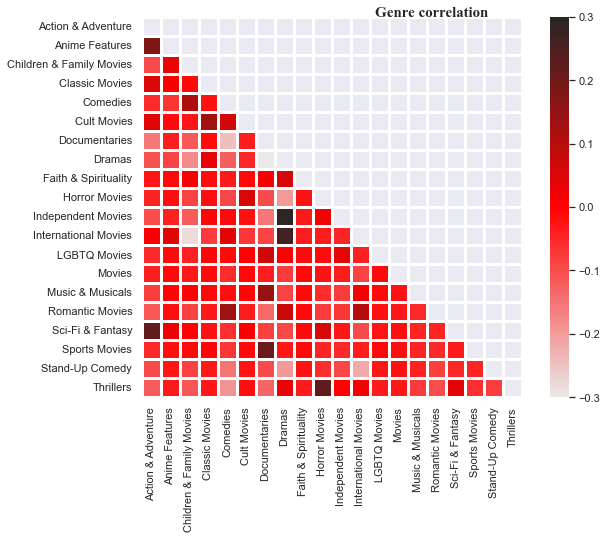

In [17]:
genre_heatmap(netflix_movies, "Movie")
plt.show()

# Which director makes most contents for Netflix

<AxesSubplot:title={'center':'Top 10 directors of Movie on Netflix'}>

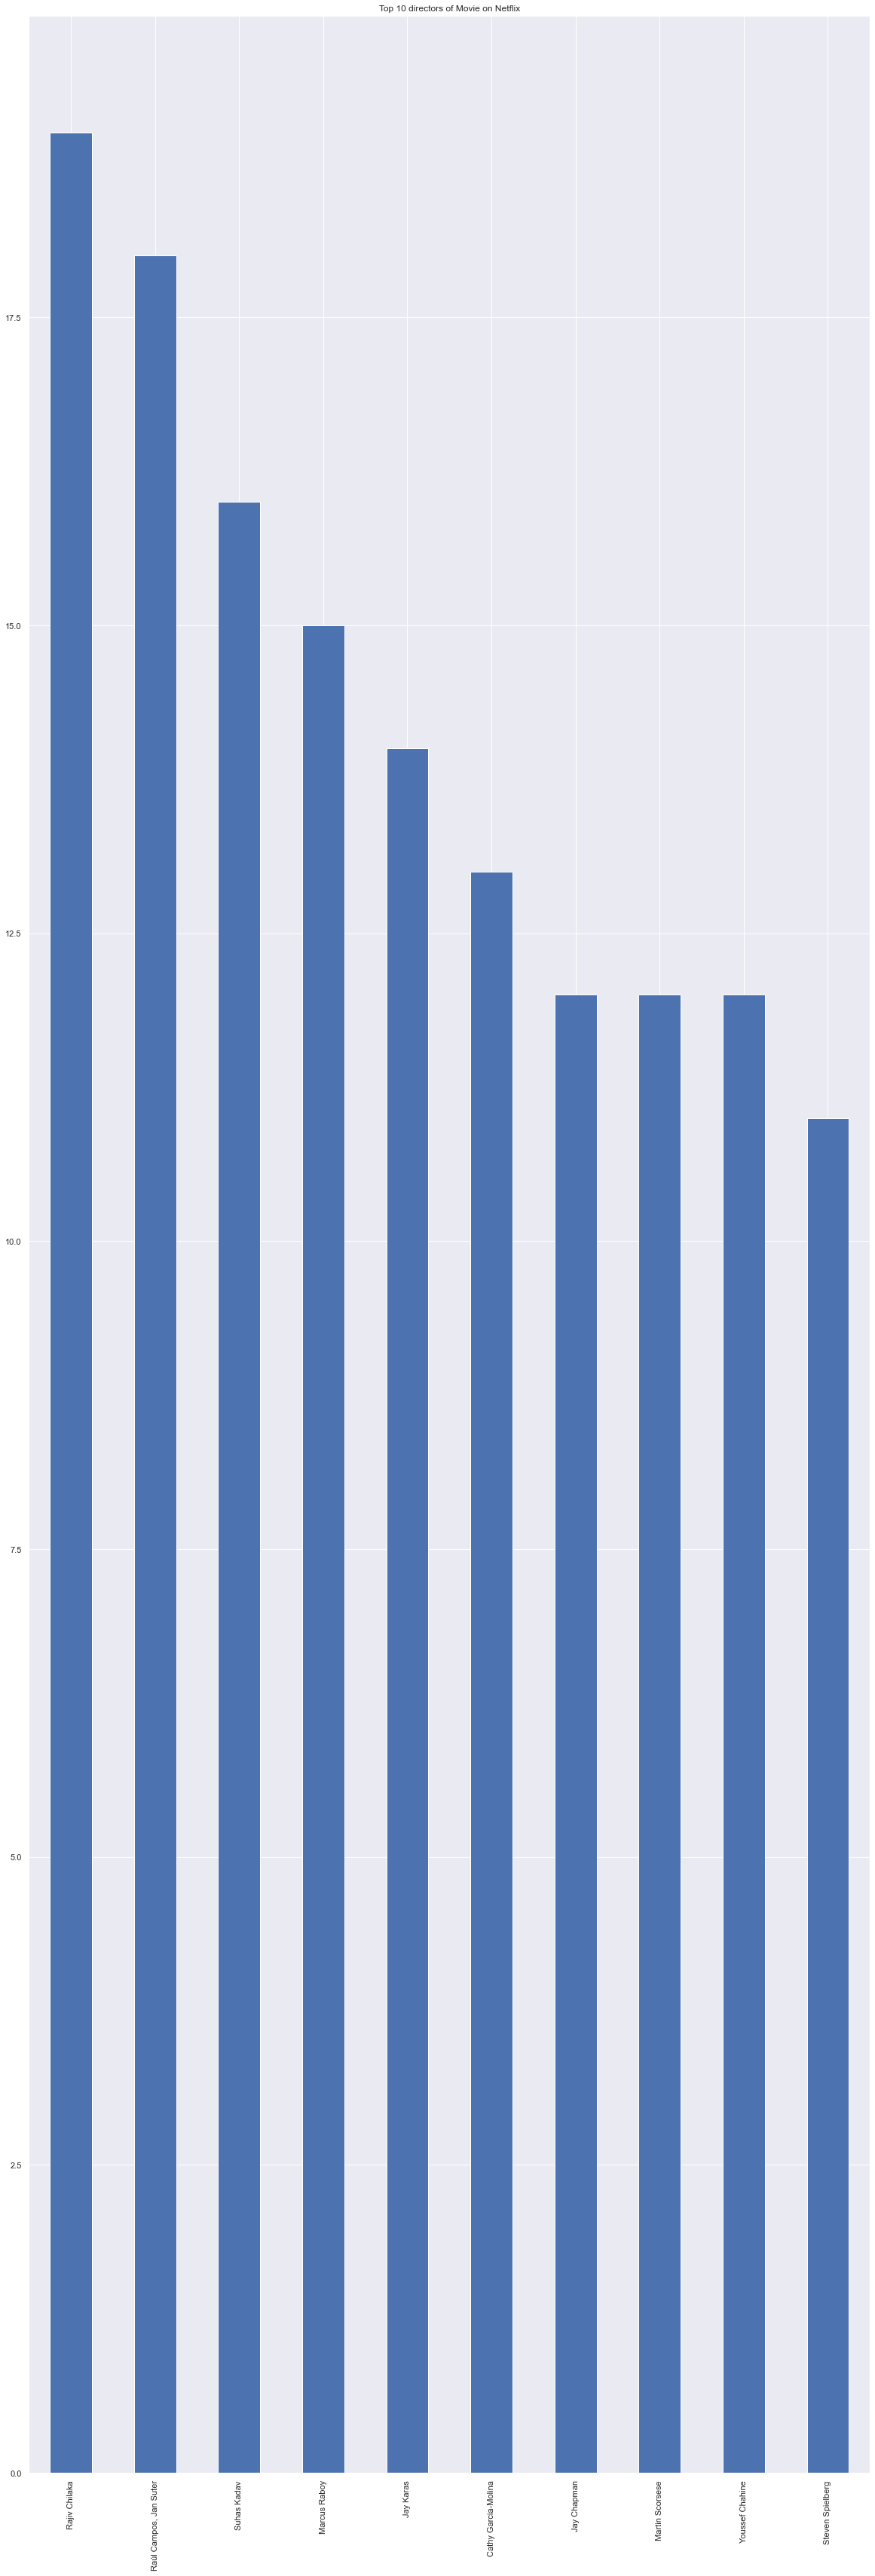

In [23]:
netflix_movies["director"].value_counts()[:10].plot(kind="bar", title="Top 10 directors of Movie on Netflix")

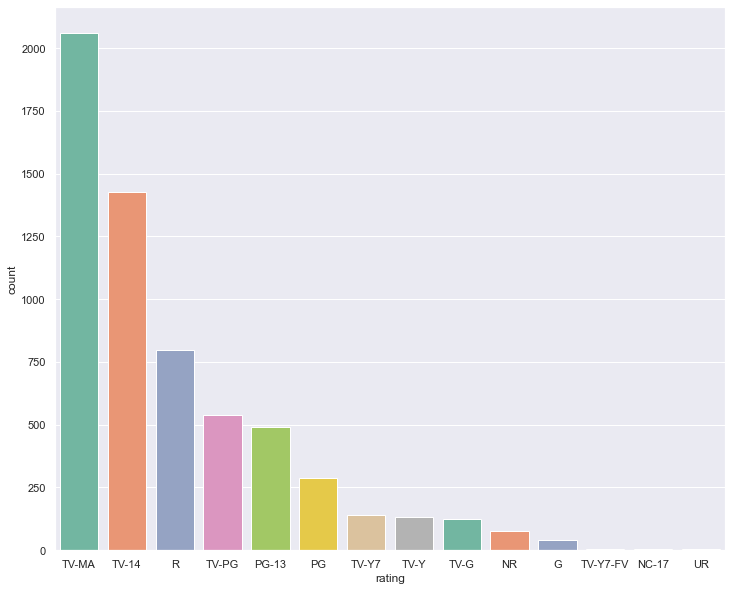

In [27]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])
fig.text(0.3, 0.58,
        '''
        The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.
        Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.
        Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".'''
        
        , fontsize=12, fontweight='light', fontfamily = "serif")
plt.show()